In [1]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
#Reading our dataset 
df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [3]:
#Spliting data into training set and test set
split = np.random.rand(len(df))<0.8
train = cdf[split]
test = cdf[~split]

In [4]:
#Converting data frames into numpy arrays 
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x =  np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [33]:
print(train_x.shape,train_y.shape)

(837, 5) (1, 837)


In [143]:
#Normalization
train_x = train_x/train_x.max()
train_y = train_y/train_y.max()
test_x = test_x/test_x.max()
test_y = test_y/test_y.max()
train_y = train_y.T

In [147]:
#Defining functions for line,Mean square error,derivative of slope and derivative of intercept
def line(m,x,c):
    return np.dot(m,x.T)+c
def error(x,m,c,y):
    return np.mean((line(m,x,c) - y)**2)
def der_slope(x,m,c,y):
    return 2* np.mean(np.multiply((line(m,x,c)-y.T),x.T),axis = 1)
def der_intercept(m,x,c,y):
    return np.mean(2 * (line(m,x,c) - y), axis = 1)
def accuracy_pred(error,y):
    return 100 - (error/np.mean(y**2))*100

In [148]:
#Performing Gradient descent loop for finding out slope and intercept
m = np.random.randn(1,5)
c = np.random.randn(1)
m_copy = m
c_copy = c
cost = []
lr = 0.0008
for i in range(len(train_x)):
    m = m - lr*der_slope(train_x,m,c,train_y)
    c = c - lr*der_intercept(train_x,m,c,train_y)
    cost.append(error(train_x,m,c,train_y))
    clear_output(True)
    
print("Initial Error: ",error(train_x,m_copy,c_copy,train_y))
print("Final Reduced Error: ",error(train_x,m,c,train_y))
print(m,c)

Initial Error:  3.646271848625148
Final Reduced Error:  0.08705788588229141
[[ 1.44981748 -0.35800276  1.29640022 -0.4690964   0.05251056]] [ 0.34917203  0.31353766  0.2717738   0.27839711  0.24236712  0.25052149
  0.24821133  0.32792959  0.32907489  0.14873617  0.14873617  0.14549081
  0.15225167  0.14549081  0.15225167  0.14873617  0.3460624   0.34811657
  0.34811657  0.32779141  0.28124447  0.28162035  0.3889203   0.28162035
  0.21668253  0.38336296  0.28162035  0.36834284  0.34332864  0.30082836
  0.42892814  0.15626388  0.1293876   0.08534512  0.1293876   0.08534512
  0.10619421  0.23224013  0.24961275  0.18245072  0.29069137  0.26411878
  0.26411878  0.20046571  0.36149024  0.36149024  0.37573557  0.37573557
  0.20046571  0.06576493  0.05643793  0.18812795  0.05643793  0.05643793
  0.33219295  0.32610262  0.34837255  0.45334287  0.45334287  0.33219295
  0.32610262  0.34228222  0.34228222  0.28501413  0.28528063  0.30146023
  0.28474764  0.33219295  0.32610262  0.28019805  0.28501

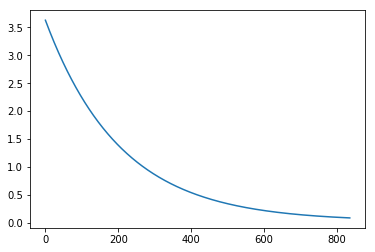

In [149]:
#plotting error reducing plot
plt.plot(cost)

In [150]:
#prediction accuracy on training and testing dataset
print("our prediction accuracy on training data set is",accuracy_pred(error(m,train_x,c,train_y),train_y))
print("our prediction accuracy on testing data set is",accuracy_pred(error(m,test_x,c,test_y),test_y))


our prediction accuracy on training data set is 65.91305408624689
our prediction accuracy on testing data set is 64.45241459736438
